In [135]:
# libs
import os
import pandas as pd
from tqdm import tqdm

# Описание

Яндекс.Еда осуществляет доставку еды из ресторанов. При этом у каждого ресторана есть зона, в рамках которой осуществляется доставка. Зона представляет собой полигон (заданы координаты его вершин). Пользователь в зависимости от своего местоположения (координат точки) видит разное количество доступных ресторанов. Нам важно, чтобы у каждого пользователя было достаточное количество ресторанов для выбора. 

## Задача: Определить для каждого пользователя доступное ему количество ресторанов.

### Creating file user_coordinates.csv 

In [2]:
# # Требования
# # Данные, которые есть (для простоты в формате .csv, несколько первых строк): user_coordinates.csv 
# # (примерно 300 тыс. строк, user_id – идентификатор пользователя)

# cols = ('user_id', 'loc_lat', 'loc_lon')
# filename_to_save = r'user_coordinates.csv'
# filename_to_save_short = r'user_coordinates_short.csv'

# lst_user_id = [1,2,3]
# lst_loc_lat = [55.737564, 56.234564, 55.234578]
# lst_loc_lon = [37.345186, 37.234590, 36.295745]


# lst_user_id_all = list(range(1,300001))
# lst_loc_lat_all = lst_loc_lat*100000
# lst_loc_lon_all = lst_loc_lon*100000


# # saving file
# pd.DataFrame({cols[0]: lst_user_id, cols[1]: lst_loc_lat, cols[2]: lst_loc_lon}).to_csv(filename_to_save_short, 
#                                                                                    encoding='utf-8', index=False)
# # saving file
# pd.DataFrame({cols[0]: lst_user_id_all, cols[1]: lst_loc_lat_all, cols[2]: lst_loc_lon_all}).to_csv(filename_to_save, 
#                                                                                    encoding='utf-8', index=False)



### Creating file place_zone_coordinates.csv

In [3]:
# # place_id – идентификатор ресторана, point_number – порядковый номер вершины полигона)

# # place_id,loc_lat,loc_lon,point_number

# # 1,55.747022,37.787073,0
# # 1,55.751713,37.784328,1
# # 1,55.753878,37.777638,2
# # 1,55.751031,37.779351,3
# # 2,55.803885,37.458311,0
# # 2,55.808677,37.464054,1
# # 2,55.809763,37.461314,2
# # 2,55.810840,37.458654,3

# # примерно 500 тыс. строк


# cols = ('place_id', 'loc_lat', 'loc_lon', 'point_number')
# filename_to_save = r'place_zone_coordinates.csv'
# filename_to_save_short = r'place_zone_coordinates_short.csv'

# lst_user_id = [1,1,1,1,2,2,2,2]
# lst_loc_lat = [55.747022, 55.751713, 55.753878, 55.751031, 55.803885, 55.808677, 55.809763, 55.810840]
# lst_loc_lon = [37.787073, 37.784328, 37.777638, 37.779351, 37.458311, 37.464054, 37.461314, 37.458654]
# lst_point_number = [0,1,2,3,0,1,2,3]



# # saving file
# pd.DataFrame({cols[0]: lst_user_id, cols[1]: lst_loc_lat, 
#               cols[2]: lst_loc_lon, cols[3]: lst_point_number}).to_csv(filename_to_save_short, encoding='utf-8', index=False)





### Reading files

In [4]:
df_users = pd.read_csv('user_coordinates_short.csv')
df_places = pd.read_csv('place_zone_coordinates_short.csv')

In [5]:
df_users.head()

,user_id,loc_lat,loc_lon
0,1,55.737564,37.345186
1,2,56.234564,37.234590
2,3,55.234578,36.295745


In [10]:
df_places

,place_id,loc_lat,loc_lon,point_number
0,1,55.747022,37.787073,0
1,1,55.751713,37.784328,1
2,1,55.753878,37.777638,2
3,1,55.751031,37.779351,3
4,2,55.803885,37.458311,0
5,2,55.808677,37.464054,1
6,2,55.809763,37.461314,2
7,2,55.810840,37.458654,3


### Trying to detect if a point is inside a polygon

In [ ]:
# пример визуализации полигона и sample датапоинтов.


# # sample user_datapoints
# x_user = [37.345186, 37.234590, 36.295745] 
# y_user = [55.737564, 56.234564, 55.234578] 

# # sample полигон
# poly = Polygon([ (37.787073, 55.747022), (37.784328, 55.751713), (37.777638, 55.753878), (37.779351, 55.751031) ])
# x,y = poly.exterior.xy

# fig = plt.figure(1, figsize=(5,5), dpi=90)
# ax = fig.add_subplot(111)
# ax.plot(x, y, color='#6699cc', alpha=0.7,
#     linewidth=3, solid_capstyle='round', zorder=2)
# ax.set_title('Polygon')
# for i, txt in enumerate(x):
#     ax.annotate(i, (x[i], y[i]))

# plt.scatter(x, y, edgecolors='black', s=30)
# plt.scatter(x_user, y_user, edgecolors='red', s=20, )

# for i, txt in enumerate(x_user):
#     ax.annotate(i, (x_user[i], y_user[i]))
    

In [11]:
# !pip install shapely

In [12]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import pyplot as plt

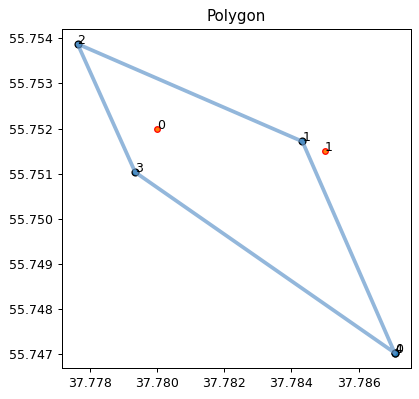

In [46]:
# пример визуализации полигона и sample датапоинтов.


# sample user_datapoints
x_user = [37.78, 37.785] 
y_user = [55.752, 55.7515] 

# sample полигон
poly = Polygon([ (37.787073, 55.747022), (37.784328, 55.751713), (37.777638, 55.753878), (37.779351, 55.751031) ])
x,y = poly.exterior.xy

fig = plt.figure(1, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')
for i, txt in enumerate(x):
    ax.annotate(i, (x[i], y[i]))

plt.scatter(x, y, edgecolors='black', s=30)
plt.scatter(x_user, y_user, edgecolors='red', s=20, )

for i, txt in enumerate(x_user):
    ax.annotate(i, (x_user[i], y_user[i]))
    

In [57]:
# Computationally, detecting if a point is inside a polygon is most 
# commonly done using a specific formula called Ray Casting algorithm
# Lets try this functionality

p1 = Point(x_user[0], y_user[0])
p2 = Point(x_user[1], y_user[1])

assert(poly.contains(p1))
assert(not poly.contains(p2))

print(poly.contains(p1)) # 0 точка на графике внутри графика
print(poly.contains(p2)) # 1 точна на графике за полиномом


True
False


In [ ]:
# ONE MORE EXAMPLE WITH NEGATIVE COORDINATES

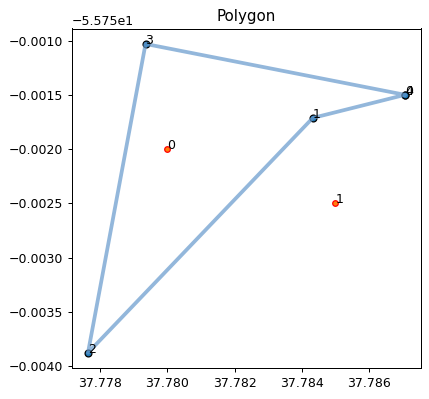

In [70]:
# пример визуализации полигона и sample датапоинтов.


# sample user_datapoints
x_user = [37.78, 37.785] 
y_user = [-55.752, -55.7525] 

# sample полигон
poly = Polygon([ (37.787073, -55.7515), (37.784328, -55.751713), (37.777638, -55.753878), (37.779351, -55.751031) ])
x,y = poly.exterior.xy

fig = plt.figure(1, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')
for i, txt in enumerate(x):
    ax.annotate(i, (x[i], y[i]))

plt.scatter(x, y, edgecolors='black', s=30)

plt.scatter(x_user, y_user, edgecolors='red', s=20, )

for i, txt in enumerate(x_user):
    ax.annotate(i, (x_user[i], y_user[i]))
    

In [71]:

p1 = Point(x_user[0], y_user[0])
p2 = Point(x_user[1], y_user[1])

assert(poly.contains(p1))
assert(not poly.contains(p2))

print(poly.contains(p1)) # 0 точка на графике внутри графика
print(poly.contains(p2)) # 1 точна на графике за полиномом


True
False


### Let's make some calculus

In [1]:
# df_users = pd.read_csv('user_coordinates_short.csv')
# df_places = pd.read_csv('place_zone_coordinates_short.csv')

df_users = pd.read_csv('user_coordinates.csv')
df_places = pd.read_csv('place_zone_coordinates.csv')

NameError: name 'pd' is not defined

In [139]:
def run_check_poly(df_places, sample_place_id, sample_user_loc_lat, sample_user_loc_lon):
    
    # filtering df_places
    df_places_filtered = df_places.copy()
    df_places_filtered = df_places_filtered[df_places_filtered['place_id']==sample_place_id ]
    df_places_filtered.sort_values(by='point_number', inplace=True)
    
    # preparing polygon for 
    lats = np.array(df_places_filtered['loc_lat'].tolist())
    longs = np.array(df_places_filtered['loc_lon'].tolist())
    points = np.array(df_places_filtered['point_number'].tolist())
    
    sample_poly = Polygon(list(zip(longs, lats)))
    sample_point = Point(sample_user_loc_lon, sample_user_loc_lat)
    
    return sample_poly.contains(sample_point)

lst_users = df_users['user_id'].unique().tolist()
lst_place_ids = df_places['place_id'].unique().tolist()


lst_result_user_id = []
lst_result_count = []

# итерируем по юзерам
with tqdm(total=df_users.shape[0]) as pbar: 
    for index, row in tqdm(df_users.iterrows()):
        pbar.update(1)

        # sample user with id, latitude, longiture
        sample_user_id = int(row['user_id'])

        sample_user_loc_lat = row['loc_lat']
        sample_user_loc_lon = row['loc_lon']

        counter = 0;
        for sample_place_id in lst_place_ids:

#             print(sample_place_id)
            check_result = run_check_poly(df_places=df_places, sample_place_id=sample_place_id, 
                        sample_user_loc_lat=sample_user_loc_lat, sample_user_loc_lon=sample_user_loc_lon )
#             print(check_result)

            if (check_result):
                counter+=1

        lst_result_user_id.append(sample_user_id)
        lst_result_count.append(counter)
    
final_result = pd.DataFrame({'user_id': lst_result_user_id, 'offer_count': lst_result_count})    


  2%|█▎                                                                         | 5439/300000 [00:14<12:08, 404.34it/s]


  4%|██▊                                                                       | 11233/300000 [00:28<13:41, 351.42it/s]


  6%|████▏                                                                     | 16724/300000 [00:42<11:44, 401.87it/s]


  7%|█████▌                                                                    | 22432/300000 [00:56<11:53, 388.82it/s]


  9%|██████▉                                                                   | 28013/300000 [01:11<15:00, 302.16it/s]


 11%|████████▎                                                                 | 33823/300000 [01:25<10:34, 419.59it/s]


 13%|█████████▊                                                                | 39753/300000 [01:39<10:20, 419.37it/s]


 15%|███████████▏                                                              | 45500/300000 [01:53<10:50, 391.35it/s]


 16%|███████████▊                                                              | 47990/300000 [02:00<10:33, 397.65it/s]


KeyboardInterrupt: 